In [1]:
#Autor: João Gonçalves

In [17]:
import os
import PIL
from PIL import Image
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [22]:
dir = 'C:/Users/joaog/OneDrive/Ambiente de Trabalho/outros/kagglecatsanddogs_5340/PetImages/'

In [21]:
path = 'C:/Users/joaog/OneDrive/Ambiente de Trabalho/outros/kagglecatsanddogs_5340/PetImages/Dog/' ##Change to CAT!!!
dir_ = os.listdir(path)
os.remove('C:/Users/joaog/OneDrive/Ambiente de Trabalho/outros/kagglecatsanddogs_5340/PetImages/Dog/thumbs.db')
for image in dir_:
    file = os.path.join(path,image)
    image = image.split('.')[0]
    if int(image)>2000:
        os.remove(file) 


for filename in dir_:
    try:
      img = Image.open(path+filename) # open the image file
      img.verify() # verify that it is, in fact an image
    except (IOError, SyntaxError) as e:
      print('Bad file:', filename)
      os.remove(path+filename) # print out the names of corrupt files

In [23]:
img_height = 256
img_width = 256
batch_size= 32

train_ds = tf.keras.utils.image_dataset_from_directory(
  dir,
  validation_split=0.05,
  labels = 'inferred',
  label_mode = 'int',
  color_mode='rgb',
  subset="training",
  shuffle = True,
  interpolation='bilinear',
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

# para treino
val_ds = tf.keras.utils.image_dataset_from_directory(
  dir,
  validation_split=0.05,
  labels = 'inferred',
  label_mode = 'int',
  color_mode='rgb',
  subset="validation",
  shuffle = True,
  interpolation='bilinear',
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

tf.keras.layers.Rescaling(
    scale=1./255, offset=0.0
)


Found 4001 files belonging to 2 classes.
Using 3801 files for training.
Found 4001 files belonging to 2 classes.
Using 200 files for validation.


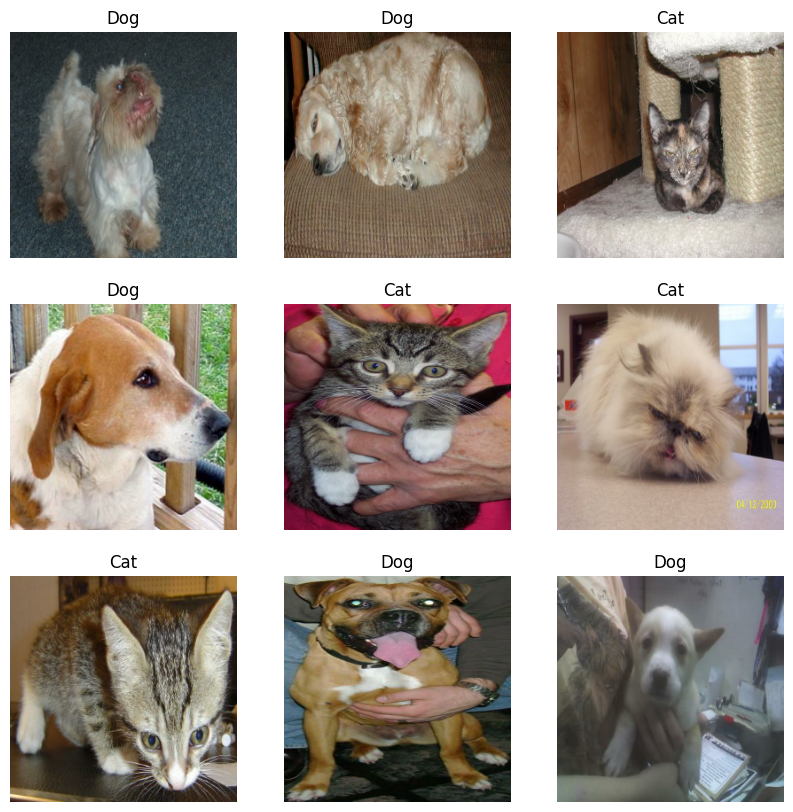

In [24]:
class_names=['Cat','Dog']

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [25]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 256, 256, 3)
(32,)


In [26]:
num_classes = 2
# modelo de rede neuronal
model = keras.Sequential([
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu",input_shape = (256,256,3),padding='same'),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.BatchNormalization(),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu",padding='same'),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.BatchNormalization(),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu",padding='same'),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.BatchNormalization(),
        layers.Conv2D(128, kernel_size=(3, 3), activation="relu",padding='same'),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.BatchNormalization(),
        layers.Conv2D(128, kernel_size=(3, 3), activation="relu",padding='same'),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(512),
        layers.Dropout(0.2),
        layers.Dense(1, activation="sigmoid"),
    ])

# sumario da rede
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 256, 256, 32)      896       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 128, 128, 32)     0         
 2D)                                                             
                                                                 
 batch_normalization_4 (Batc  (None, 128, 128, 32)     128       
 hNormalization)                                                 
                                                                 
 conv2d_6 (Conv2D)           (None, 128, 128, 64)      18496     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 64, 64, 64)       0         
 2D)                                                             
                                                      

In [27]:
epochs = 25

model.compile(loss='binary_crossentropy', optimizer='SGD', metrics=["accuracy"])

hist = model.fit(train_ds, validation_data=val_ds, epochs=epochs)

Epoch 1/25
119/119 [==============================] - 13s 100ms/step - loss: 1.1444 - accuracy: 0.5991 - val_loss: 0.6714 - val_accuracy: 0.5400
Epoch 2/25
119/119 [==============================] - 11s 91ms/step - loss: 0.5839 - accuracy: 0.6974 - val_loss: 0.5758 - val_accuracy: 0.7300
Epoch 3/25
119/119 [==============================] - 11s 89ms/step - loss: 0.5069 - accuracy: 0.7493 - val_loss: 0.5174 - val_accuracy: 0.7350
Epoch 4/25
119/119 [==============================] - 11s 89ms/step - loss: 0.4510 - accuracy: 0.7898 - val_loss: 0.6053 - val_accuracy: 0.7000
Epoch 5/25
119/119 [==============================] - 11s 90ms/step - loss: 0.4242 - accuracy: 0.8103 - val_loss: 1.1248 - val_accuracy: 0.5600
Epoch 6/25
119/119 [==============================] - 11s 91ms/step - loss: 0.3702 - accuracy: 0.8321 - val_loss: 0.5346 - val_accuracy: 0.7450
Epoch 7/25
119/119 [==============================] - 11s 89ms/step - loss: 0.3703 - accuracy: 0.8316 - val_loss: 0.5153 - val_accuracy

1/1 [==============================] - 0s 90ms/step
The model predicts: Cat.


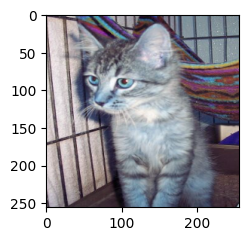

In [28]:
image_path = dir + "/Cat/2.jpg"
image_color = cv2.resize(cv2.imread(image_path, cv2.IMREAD_COLOR), (256,256), interpolation=cv2.INTER_CUBIC)
image = tf.expand_dims(np.array(image_color).astype("float32") / 255, 0)   
pred = model.predict(image)
pred = np.argmax(pred)
classe = ['Cat', 'Dog']
plt.figure(figsize=(5,2.5))
plt.imshow(image_color)
print("The model predicts: " + classe[pred] + ".")